# Some Initiation Code.

In [159]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import LeavePGroupsOut
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from scipy.stats import pearsonr

def get_file_list():
    path = "../data/FixedInterval Agrregates"
    owd = os.getcwd()
    os.chdir(path)
    file_list = [student for student in os.listdir() if "student" in student]
    files= [ path+"/"+student+"/one_day_aggregate.csv" for student in file_list]
    os.chdir(owd)
    
    return files

def adjust_stress_values(stress_level):
    mapping = {
        1:2,
        2:3,
        3:4,
        4:1,
        5:0
    }
    
    return mapping[stress_level]

def generate_barplot(dataframe, title=None, xlabel=None, ylabel=None, file_path=None, show_fig=True):
    dataframe.reset_index(inplace=True)
    dataframe["x_label"] = dataframe["level_0"] + "_"  + dataframe["level_1"]
    dataframe.drop(columns=["level_0", "level_1"], inplace=True)
    dataframe.sort_values(by=0, ascending=False, inplace=True)
    
    # Plotting code.
    fig, ax =  plt.subplots(figsize=(22,22))
    plt.barh(np.arange(len(dataframe)), dataframe.iloc[:, 0], log=True)
    plt.yticks(np.arange(0, 100+1, 1.0))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    
    y_ticks = dataframe.iloc[:, 1]
    y_ticks.reset_index(drop=True, inplace=True)
    ax.set_yticklabels(labels=y_ticks)
    plt.gca().invert_yaxis()
    plt.savefig(file_path)
    if show_fig:
        plt.show()
        
    plt.close()
    
def generate_scatter_plot(x, y, pred_values, title=None, xlabel=None, ylabel=None, file_path=None, show=False):
    
    color_dict = {0:'blue', 1:'green', 2:'yellow', 3:'red', 4:'black'}
    label_dict = {0:'Feeling Great', 1:'Feeling Good', 2:'A Little Stressed', 3:'Stressed Out', 4:'Definitly Stressed'}
    trans_dict = {0:1, 1: 0.8, 2:0.5, 3: 0.8, 4:0.9}
    
    fig, ax = plt.subplots(figsize=(14,14))
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for stress_level in label_dict:
        mask = pred_values == stress_level
        plt.scatter(x[mask], y[mask], c=color_dict[stress_level], label=label_dict[stress_level])
    
    plt.legend(loc="best")
    plt.savefig(file_path)
    if show:
        plt.show()
    plt.close()

max_features = len(train_x_final.columns)
# max_features = 2

def get_data(stress_agg='min', verbose=False, scaling=False, previous_stress=False):

    train_data = pd.DataFrame()
    file_list = get_file_list()
    file_list = file_list[:1]
    student_count = len(file_list)

    for file in file_list:
        temp_data = pd.read_csv(file,
                                index_col=0,
                                header=[0, 1])
        
        
        if previous_stress:
            # Modelling prevoius stress level to the data frame
            previous_stress_levels = temp_data.loc[:, ("stress_level", stress_agg)]
            previous_stress_levels_len = len(previous_stress_levels)
            previous_stress_levels = [2] + list(previous_stress_levels)
            previous_stress_levels = previous_stress_levels[:previous_stress_levels_len]
            index = len(temp_data.columns)-3
            
            temp_data.insert(index, "previous_stress_level", previous_stress_levels)
#             temp_data = temp_data[temp_data.previous_stress_level != 100]
            
        
        train_data = train_data.append(temp_data)
    
    # Fixing Inf Values, NaN values in df.
    train_data.replace(np.inf, 10000000, inplace=True)
    train_data.replace(-np.inf, -10000000, inplace=True)
    train_data.fillna(method='pad', inplace=True)
    train_data.fillna(value=0, inplace=True)
    
    # Slicing our train set into labels and training data.
    students, train_x, train_y = train_data.iloc[:, 0], train_data.iloc[:, 1:-3], train_data.loc[:, ("stress_level", stress_agg)]
    
    # Calculating Label Distribution for train and test.
    train_label_dist = train_y.value_counts()
    
    # Adjusting the Stress values to a scale from 0-4.    
    train_y = train_y.apply(adjust_stress_values)
    
    if verbose:
        display(train_y.value_counts().sort_index())
        display(train_x.head(2))
        display(train_y.head(2))
    
    if scaling:
        # Transforming Data by getting custom transformer.
        transformer = StandardScaler()
        transforemd_train_x = transformer.fit_transform(train_x)
#         transforemd_train_x = normalize(train_x)
        train_x = pd.DataFrame(transforemd_train_x, columns=train_x.columns)
    
    return students, train_x, train_y

students, train_x, train_y = get_data(scaling=False, verbose=False, previous_stress=True)
display(train_x.head(5))

sum               mean                std  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24                0.0           0.000000           0.000000   
2013-03-25                0.0           0.000000           0.000000   
2013-03-26                0.0           0.000000           0.000000   
2013-03-27              785.0           0.116021           0.478653   
2013-03-28             1145.0           0.142466           0.480309   

                       median                var               skew  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24                0.0           0.000000           0.000000   
2013-03-25                0.0           0.000000           0.000000   
2013-03-26                0.0           0.000000           0.000000   
2013-03-27                0.0           0.229109           4.499333   
2013-03-28                0.0           0.230696           3.928749   

                     linear_m           linear_c             poly_a  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24           0.000000           0.000000       0.000000e+00   
2013-03-25           0.000000           0.000000       0.000000e+00   
2013-03-26           0.000000           0.000000       0.000000e+00   
2013-03-27           0.000032           0.007809      -1.305164e-08   
2013-03-28           0.000052          -0.067551       2.158428e-08   

                       poly_b          ...                   sum        mean  \
           activity_inference          ...          sleep_rating hours_slept   
time                                   ...                                     
2013-03-24           0.000000          ...                   8.0         7.0   
2013-03-25           0.000000          ...                   0.0         0.0   
2013-03-26           0.000000          ...                   0.0         0.0   
2013-03-27           0.000120          ...                   6.0         7.0   
2013-03-28          -0.000121          ...                   2.0        10.0   

                                min                      max               \
           sleep_rating hours_slept sleep_rating hours_slept sleep_rating   
time                                                                        
2013-03-24          2.0         7.0          2.0         7.0          2.0   
2013-03-25          0.0         0.0          0.0         0.0          0.0   
2013-03-26          0.0         0.0          0.0         0.0          0.0   
2013-03-27          2.0         7.0          2.0         7.0          2.0   
2013-03-28          1.0        10.0          1.0        10.0          1.0   

                    sum                  dow previous_stress_level  
           sms_instance Unnamed: 102_level_1                        
time                                                                
2013-03-24           23                    6                   2.0  
2013-03-25           24                    0                   1.0  
2013-03-26           24                    1                   1.0  
2013-03-27           25                    2                   1.0  
2013-03-28           25                    3                   4.0  

[5 rows x 102 columns]

Visualizing the variances of each Columns. By looking at the variances of few of the feature, we find that most of them are pretty low. We can chose only the ones that have a variance greated that 0.1.
# Doing Feature Selection using a Variance Threshold.


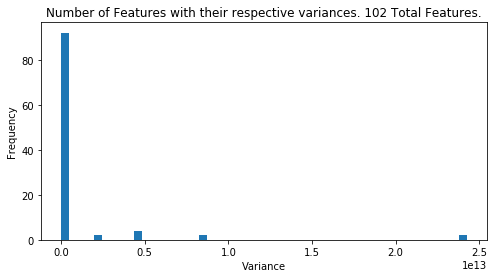

In [150]:
variance = train_x.var(axis=0)

# Plotting HistoGram of Variances.
plt.figure(figsize=(8,4))
variance.plot.hist(bins=50)
plt.title("Number of Features with their respective variances. 102 Total Features.")
plt.xlabel("Variance")
plt.savefig("./FeatureImportance Plots/VarHistPlot.jpg")
plt.show()

# Seeing Variance of each column.
variance = pd.DataFrame(variance)
    
generate_barplot(variance,
                title="Plot Ranking Each Feature Using Variance as a Metric",
                xlabel="Variance",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingVarMetric.jpg",
                show_fig=False
               )


In [151]:
def feature_selection_var(train_x, threshold=5,verbose=False):
    
    var_selector = VarianceThreshold(threshold=threshold)
    var_selector.fit(train_x)
    selected = var_selector.get_support(indices=True)
    not_selected = [i for i in range(len(train_x.columns)) if i not in selected ]
    result = train_x.iloc[:, selected]
    
    if verbose:
        print("Selected :{} features form :{}".format( len(selected), len(train_x.columns)))
        print("Features Selected are:")
    
    selected = list(train_x.iloc[:, selected].columns)
    not_selected = list(train_x.iloc[:, not_selected].columns)

    if verbose:
        print("Selected Features")
        for feature in selected:
            print(feature)

        print("\n")
        print("Not Selected Features")
        for feature in not_selected:
            print(feature)

    return result
              
# refine_train_x = feature_selection_var(train_x,threshold=5, verbose=False)

# Feature Selection using Univariate Statistical Importance Classification.

Feature Selection Using Mutual Information.
Link - https://en.wikipedia.org/wiki/Mutual_information

In [152]:
from sklearn.feature_selection import mutual_info_classif

def feature_selection_mutualinfo_classif(train_x, train_y, verbose=False):
    
    mi = pd.DataFrame(mutual_info_classif(train_x, train_y), index=train_x.columns) 
    
    if verbose:
        print("Mutual Information in:")
        display(mi)

    return mi

mi_classif = feature_selection_mutualinfo_classif(train_x, train_y, verbose=False)


generate_barplot(mi_classif,
                title="Plot Ranking Each Feature Using Mutual Information Classification (Corelation Based)",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingMIClassif.jpg",
                show_fig=False
               )


Feature Selection using F-test.

In [153]:
def feature_selection_f_classif(train_x, train_y, verbose=False):
    
    f_values, p_values = f_classif(train_x, train_y)
    f_values= pd.DataFrame(f_values, index=train_x.columns) 
    p_values= pd.DataFrame(p_values, index=train_x.columns) 
    
    if verbose:
        print("F-values and P-values are: ")
        print_df = pd.concat([f_values, p_values], axis=1)
        display(print_df)

    return f_values, p_values

f_values, p_values = feature_selection_f_classif(train_x, train_y, verbose=False)

generate_barplot(f_values,
                title="Plot Ranking Each Feature F-test Classification",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingF_Test_classification.jpg",
                show_fig=False
               )

generate_barplot(p_values,
                title="Plot Ranking Each Feature P-values Classification",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingP_values_classification.jpg",
                show_fig=False
               )


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 3 11] are constant.
  UserWarning)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


# Feature Selection for Regression.
Feature Selection using Mutual Information.

In [154]:
from sklearn.feature_selection import mutual_info_classif

def feature_selection_mutualinfo_regress(train_x, train_y, verbose=False):
    
    mi = pd.DataFrame(mutual_info_regression(train_x, train_y), index=train_x.columns) 
    
    if verbose:
        print("Mutual Information in:")
        display(mi)

    return mi

mi_regress = feature_selection_mutualinfo_regress(train_x, train_y, verbose=False)

generate_barplot(mi_regress,
                title="Plot Ranking Each Feature Using Mutual Information Regression (Corelation Based)",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingMIRegression.jpg",
                show_fig=False
               )


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Feature Selection using F-regression.

In [155]:
def feature_selection_f_regress(train_x, train_y, verbose=False):
    
    f_values, p_values = f_regression(train_x, train_y)
    f_values= pd.DataFrame(f_values, index=train_x.columns) 
    p_values= pd.DataFrame(p_values, index=train_x.columns) 
    
    if verbose:
        print("F-values and P-values are: ")
        print_df = pd.concat([f_values, p_values], axis=1)
        display(print_df)

    return f_values, p_values

f_values, p_values = feature_selection_f_regress(train_x, train_y, verbose=False)

generate_barplot(f_values,
                title="Plot Ranking Each Feature F-test Regression",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingF_Test_regression.jpg",
                show_fig=False
               )

generate_barplot(p_values,
                title="Plot Ranking Each Feature P-values Regression",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingP_values_regression.jpg",
                show_fig=False
               )

C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


# Pearson Correlation Coefficient.

In [156]:
def pearsonr_test(train_x, train_y, verbose=False):
    
    p_values = []
    level_0 = []
    level_1 = []
    pd.options.display.max_rows = 150
    
    for column in train_x.columns:
        
        high, low = column
        temp = list(pearsonr(train_x[column], train_y)) 
        level_0.append(high)
        level_1.append(low)
        p_values.append(temp) 

    if verbose:
        print("P-values are: ")
        display(p_values, )
    
    p_values = pd.DataFrame(p_values, index=[level_0, level_1])
    
    return p_values

p_values = pearsonr_test(train_x, train_y, verbose=False)


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


# Recursive Feature Elimation with Logistic Regression.
Selecting top 60 features from Mutual information. Completing Logistic Regression for Scatter plots.
Generating Scatter Plots for 20 features from recursive feature elimination.

In [183]:
# Selecting the top 60 features using Mutual Information Classif
n_features = 60
mi_classif = feature_selection_mutualinfo_classif(train_x, train_y, verbose=False)
mi_classif.reset_index(drop=True, inplace=True)
selected = mi_classif.nlargest(n_features, columns=0).index
selected = list(selected)
train_x_refined = train_x.iloc[:, selected]

# Normalizing the data before training with Logistic Regression.
scaler = normalize
train_x_refined_norm = pd.DataFrame(scaler(train_x_refined), columns=train_x_refined.columns)

# Using Loso Cross Validation with Recursive Feature Elimination.
loso = LeaveOneGroupOut()
cv = loso.get_n_splits(train_x_refined_norm, train_y, train_y)

LogisticRegression_params = {
  "penalty": ['l1', 'l2'],
  "C": [5, 2, 1, 0.1,0.05, 0.03, 0.0275,0.025, 0.02 , 0.01, 0.009, 0.0075, 0.005, 0.001],
  "dual":[False],
  "class_weight": ['balanced'],
  "random_state": [100],
  "max_iter": [5, 10, 15, 20, 30, 50, 80, 100],
  "fit_intercept": [True, False],
  "tol": [0.1, 0.05 ,0.01, 0.001, 0.0001, 0.00001]}

gridsearch = GridSearchCV(LogisticRegression(), param_grid=LogisticRegression_params, cv=cv, scoring="accuracy")
gridsearch.fit(train_x_refined_norm, train_y)
best_estimator = gridsearch.best_estimator_

print("best_Score : {} \n achieved by estimator :{}".format(gridsearch.best_score_, gridsearch.best_estimator_))

selector = RFE(best_estimator, n_features_to_select=20, step=1)
selector.get_params()
selector.fit(train_x_refined, train_y)
train_x_final = train_x_refined.iloc[:,  selector.support_]
train_x_final_norm = train_x_refined_norm.iloc[:,  selector.support_]

for i in range(max_features):
    for j in range(i, max_features):
        if i != j:
            
            x , y = train_x_final.iloc[:, i], train_x_final.iloc[:, j]
            xlabel = "_".join(train_x_final.columns[i])
            ylabel = "_".join(train_x_final.columns[j])
            title = "Plot of Features {} and {}".format(xlabel, ylabel)
            file_path = "./FeatureImportance Plots/FeatureScatterPlots/LogisticRegressRFE/scatter_classif_{}_{}.jpg".format(xlabel, ylabel)
            generate_scatter_plot(x, y, train_y, title=title, xlabel=xlabel, ylabel=ylabel, file_path=file_path, show=False)


# Finally fitting on the selected Features.

gridsearch.fit(train_x_final_norm, train_y)
best_estimator = gridsearch.best_estimator_
print("After Feature Selection best_Score : {} \n achieved by estimator :{}".format(gridsearch.best_score_, gridsearch.best_estimator_))

# best_Score : 0.4888888888888889 
#  achieved by estimator :LogisticRegression(C=0.1, class_weight='balanced', dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=10,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


best_Score : 0.4666666666666667 
 achieved by estimator :LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


After Feature Selection best_Score : 0.4666666666666667 
 achieved by estimator :LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)


# Recursive Feature Elimation with Linear Regression. 
Selecting top 60 features from Mutual information for Regression.
Generating Scatter Plots for 20 features from recursive feature elimination using Linear Regression.

In [158]:
# Selecting the top 60 features using Mutual Information Classif
n_features = 60
mi_regress = feature_selection_mutualinfo_regress(train_x, train_y, verbose=False)
mi_regress.reset_index(drop=True, inplace=True)
selected = mi_regress.nlargest(n_features, columns=0).index
selected = list(selected)
train_x_refined = train_x.iloc[:, selected]

# Normalizing the data before training with Logistic Regression.
scaler = normalize
train_x_refined_norm = pd.DataFrame(scaler(train_x_refined), columns=train_x_refined.columns)


# Using Loso Cross Validation with Recursive Feature Elimination.
loso = LeaveOneGroupOut()
cv = loso.get_n_splits(train_x_refined_norm, train_y, train_y)

LinearRegression_params = {
  "penalty": ['l1', 'l2'],
  "C": [5, 2, 1, 0.1, 0.01, 0.001],
  "class_weight": ['balanced'],
  "random_state": [100]}

gridsearch = GridSearchCV(LinearRegression(), param_grid=LogisticRegression_params, cv=cv, scoring="accuracy")

print(gridsearch.get_params().keys())
# gridsearch.fit(train_x_refined, train_y)
# best_estimator = gridsearch.best_estimator_

# print(best_estimator)

# selector = RFE(best_estimator, n_features_to_select=20, step=1)
# selector.get_params()
# selector.fit(train_x_refined, train_y)
# train_x_final = train_x_refined.iloc[:,  selector.support_]

# for i in range(max_features):
#     for j in range(i, max_features):
#         if i != j:
            
#             x , y = train_x_final.iloc[:, i], train_x_final.iloc[:, j]
#             xlabel = "_".join(train_x_final.columns[i])
#             ylabel = "_".join(train_x_final.columns[j])
#             title = "Plot of Features {} and {}".format(xlabel, ylabel)
#             file_path = "./FeatureImportance Plots/FeatureScatterPlots/LogisticRegressRFE/scatter_{}_{}.jpg".format(xlabel, ylabel)
#             generate_scatter_plot(x, y, train_y, title=title, xlabel=xlabel, ylabel=ylabel, file_path=file_path, show=False)


dict_keys(['cv', 'error_score', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__n_jobs', 'estimator__normalize', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
